In [58]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [59]:
df = pd.read_csv('mnist_train.csv')
x_train = df.drop('label', axis=1)
y_train = df['label']

x_train.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
x_train = x_train.astype("float32") / 255

In [61]:
import keras
import os
os.environ["KERAS_BACKEND"] = "torch"
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, Dense, Reshape, Cropping2D

In [62]:
x_train = x_train.values.reshape(x_train.shape[0], 28,28,1)

In [ ]:
# https://towardsdatascience.com/understand-transposed-convolutions-and-build-your-own-transposed-convolution-layer-from-scratch-4f5d97b2967

# Encoder
encoder = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Flatten(),
    Dense(2, activation='linear')  # 2D latent space
], name="Encoder")

# Decoder
decoder = Sequential([
    Dense(128 * 4 * 4, activation='relu', input_shape=(2,)),
    Reshape((4, 4, 128)),  # Start with (4, 4, 128)
    Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=(2, 2)),  # (8, 8, 128)
    Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2)),   # (16, 16, 64)
    Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=(2, 2)),  # (32, 32, 32)
    Conv2D(1, (3, 3), activation='relu', padding='same'),  # Output: (32, 32, 1)
    Cropping2D(((2, 2), (2, 2)))  # Crop back to (28, 28, 1)
], name="Decoder")

# Autoencoder (combine encoder and decoder)
autoencoder = Sequential([encoder, decoder])





c:\Users\marco\Dropbox\Code\JUPYTER\DSM2024\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\marco\Dropbox\Code\JUPYTER\DSM2024\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
encoder.summary()

Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
decoder.summary()

Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 2048)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_16 (Reshape)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_36             │ (None, 8, 8, 128)      │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_37             │ (None, 16, 16, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_38             │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 32, 32, 1)      │           289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d_3 (Cropping2D)       │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 246,273 (962.00 KB)

 Trainable params: 246,273 (962.00 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - loss: 0.0654
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0469
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0436
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - loss: 0.0418
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0408


In [67]:
T = encoder.predict(x_train)
T.shape

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


(60000, 2)

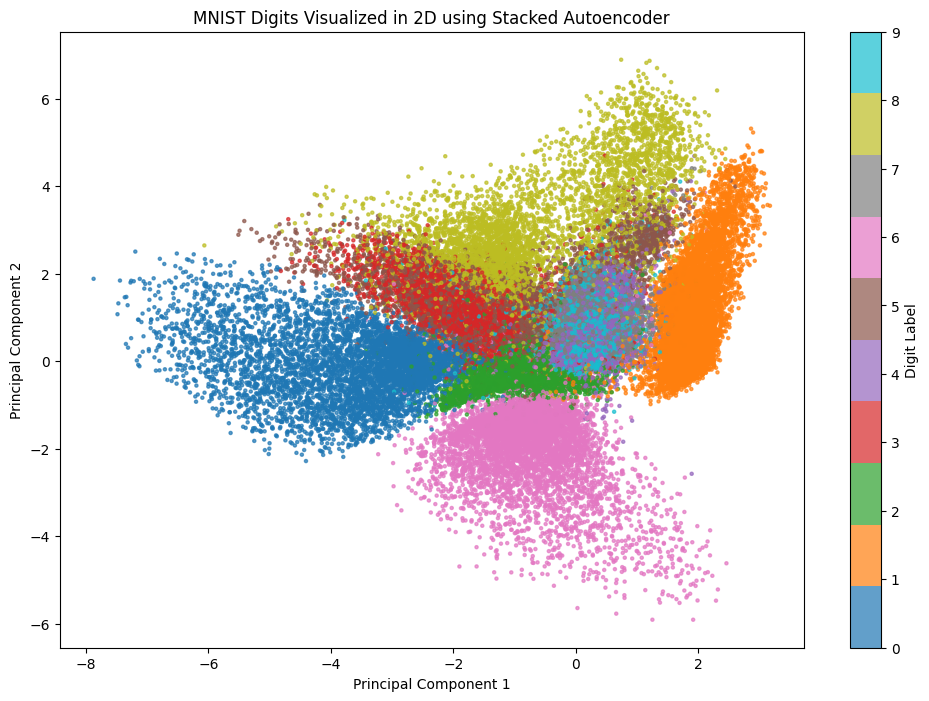

In [68]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(T[:, 0], T[:, 1], c=y_train, cmap='tab10', alpha=0.7, s=5)
plt.colorbar(scatter, label='Digit Label')
plt.title('MNIST Digits Visualized in 2D using Stacked Autoencoder')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


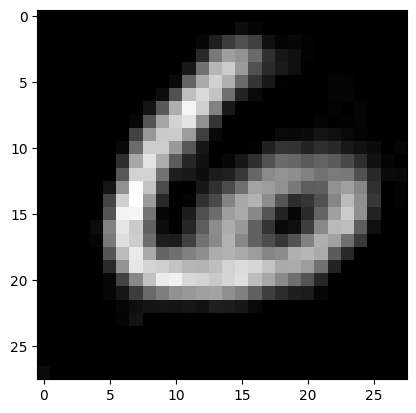

In [77]:
arr = np.array([[-2,-6]])
gen_img = decoder.predict(arr)
plt.imshow(gen_img.reshape(28,28), cmap='gray')
plt.show()